# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values # Get the last column only

print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Training the Linear Regression model on the whole dataset

In [3]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X, y) # Train model on all data

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [24]:
# Same features will be squared and optimal coefficients will be selected
# Create matrix of powered features
from sklearn.preprocessing import PolynomialFeatures

polynomial_regressor = PolynomialFeatures(degree = 4)
# Transform level matrix of a single feature into new matrix of features composed of X1 as the first
#   feature and X1^2 as second feature
X_poly = polynomial_regressor.fit_transform(X)
# Train the model with the new coefficients
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_poly, y)
print(X_poly)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


## Visualising the Linear Regression results

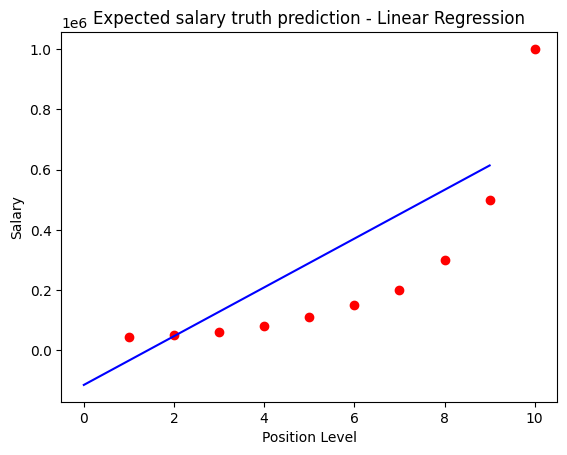

In [25]:
plt.scatter(X, y, color='red')
plt.plot(linear_regressor.predict(X), color='blue')
plt.title('Expected salary truth prediction - Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Red points are real salaries [0, 1e6]
# As seen, linear regression model is not well adapted

## Visualising the Polynomial Regression results

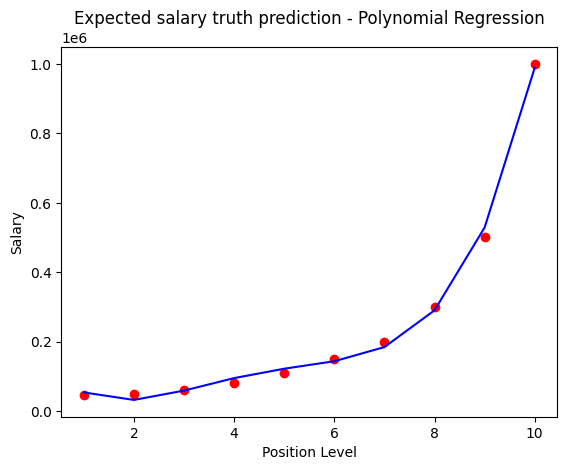

In [26]:
plt.scatter(X, y, color='red')
# Changed input to transformed matrix
plt.plot(X, linear_regressor_2.predict(polynomial_regressor.fit_transform(X)), color='blue')
plt.title('Expected salary truth prediction - Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Changed degree to 4, y = b + bx + bx^2 + bx^3, overfitted the data but it is ok for now.

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

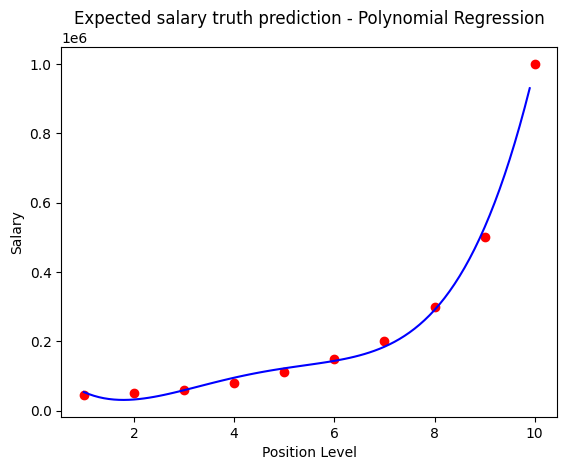

In [30]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
# Changed input to transformed matrix
plt.plot(X_grid, linear_regressor_2.predict(polynomial_regressor.fit_transform(X_grid)), color='blue')
plt.title('Expected salary truth prediction - Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Changed degree to 4, y = b + bx + bx^2 + bx^3, overfitted the data but it is ok for now.

## Predicting a new result with Linear Regression

In [32]:
linear_regressor.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [37]:
linear_regressor_2.predict(polynomial_regressor.fit_transform([[6.5]]))

array([158862.45265155])